In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [104]:
def get_latest_results_file(name) -> str:
    results_files = os.listdir("results/")
    results_files = [file for file in results_files if name in file]
    assert len(results_files) > 0, f"No results file with pattern: {name}"
    results_files = sorted(results_files, reverse=True)
    results_file_path = os.path.join("results/", results_files[0])
    return results_file_path

def merge_lzbench_and_entropy(name, simplify_filename_column=True, save_to_csv=True):
    lzbench_results_file = get_latest_results_file(f"{name}_lzbench")
    lzbench_df = pd.read_csv(lzbench_results_file)
    assert lzbench_df.shape[0] > 0
    if simplify_filename_column:
        lzbench_df["Filename"] = lzbench_df["Filename"].apply(lambda f: str(os.path.basename(f)))

    entropy_results_file = get_latest_results_file(f"{name}_entropy")
    entropy_df = pd.read_csv(entropy_results_file)
    assert entropy_df.shape[0] > 0
    if simplify_filename_column:
        entropy_df["Filename"] = entropy_df["Filename"].apply(lambda f: str(os.path.basename(f)))
    
    merged = pd.merge(lzbench_df, entropy_df, on="Filename", how="inner")
    merged.to_csv(f"results/merged_{os.path.basename(lzbench_results_file)}_{os.path.basename(entropy_results_file)}.csv")
    return merged



In [60]:
results_file = get_latest_results_file("corpus_lzbench")
lzbench_df = pd.read_csv(results_file)
lzbench_df.head()

,Compressor name,Compression speed,Decompression speed,Original size,Compressed size,Ratio,Filename
0,memcpy,14826.23,14987.88,74451352,74451352,100.00,./micronaut-shopcart-x64-O2
1,fastlz 0.5.0 -1,148.26,404.74,74451352,42860798,57.57,./micronaut-shopcart-x64-O2
2,fastlz 0.5.0 -2,159.75,402.64,74451352,41766541,56.10,./micronaut-shopcart-x64-O2
3,kanzi 2.3 -1,142.26,785.56,74451352,34381439,46.18,./micronaut-shopcart-x64-O2
4,kanzi 2.3 -2,123.74,277.03,74451352,28649622,38.48,./micronaut-shopcart-x64-O2


In [61]:
entropy_df = pd.read_csv(get_latest_results_file("corpus_entropy"))
entropy_df.head()

,Filename,File-bits,Entropy,Chi-square,Mean,Monte-Carlo-Pi,Serial-Correlation
0,./hello-isolate-x64-O3,66602624,0.907274,8.376370e+06,0.322682,3.514066,0.278089
1,./hello-isolate-x64-O2,56641152,0.884956,8.790600e+06,0.303024,3.578510,0.288039
2,./hello-isolate-x64-prof,61340032,0.887778,9.292735e+06,0.305388,3.630727,0.254215
3,./fork-join-pool-isolate-x64-O3,66602624,0.908370,8.279572e+06,0.323710,3.514227,0.277594
4,./fork-join-pool-isolate-x64-O2,56641152,0.885441,8.754577e+06,0.303428,3.573514,0.286582


In [71]:
merged = pd.merge(lzbench_df, entropy_df, on="Filename", how="inner")
merged.head()

,Compressor name,Compression speed,Decompression speed,Original size,Compressed size,Ratio,Filename,File-bits,Entropy,Chi-square,Mean,Monte-Carlo-Pi,Serial-Correlation
0,memcpy,14826.23,14987.88,74451352,74451352,100.00,./micronaut-shopcart-x64-O2,595610816,0.926831,5.938652e+07,0.342118,3.433921,0.243817
1,fastlz 0.5.0 -1,148.26,404.74,74451352,42860798,57.57,./micronaut-shopcart-x64-O2,595610816,0.926831,5.938652e+07,0.342118,3.433921,0.243817
2,fastlz 0.5.0 -2,159.75,402.64,74451352,41766541,56.10,./micronaut-shopcart-x64-O2,595610816,0.926831,5.938652e+07,0.342118,3.433921,0.243817
3,kanzi 2.3 -1,142.26,785.56,74451352,34381439,46.18,./micronaut-shopcart-x64-O2,595610816,0.926831,5.938652e+07,0.342118,3.433921,0.243817
4,kanzi 2.3 -2,123.74,277.03,74451352,28649622,38.48,./micronaut-shopcart-x64-O2,595610816,0.926831,5.938652e+07,0.342118,3.433921,0.243817


In [63]:
compressor_names = merged["Compressor name"].unique()
compressor_names

array(['memcpy', 'fastlz 0.5.0 -1', 'fastlz 0.5.0 -2', 'kanzi 2.3 -1',
       'kanzi 2.3 -2', 'kanzi 2.3 -3', 'lizard 2.1 -10', 'lizard 2.1 -11',
       'lizard 2.1 -12', 'lizard 2.1 -13', 'lizard 2.1 -14', 'lz4 1.10.0',
       'lz4 1.10.0 --fast -3', 'lz4 1.10.0 --fast -17', 'lzav 4.22 -1',
       'lzav 4.22 -2', 'lzf 3.6 -0', 'lzf 3.6 -1', 'lzfse 2017-03-08',
       'lzo1b 2.10 -1', 'lzo1c 2.10 -1', 'lzof 2.10 -1', 'lzo1x 2.10 -1',
       'lzo1y 2.10 -1', 'lzsse4fast 2019-04-18', 'lzsse8 2019-04-18 -1',
       'lzvn 2017-03-08', 'quicklz 1.5.0 -1', 'quicklz 1.5.0 -2',
       'snappy 1.2.1', 'zstd 1.5.7 -1', 'zstd 1.5.7 -2', 'zstd 1.5.7 -3',
       'zstd 1.5.7 -4', 'zstd 1.5.7 -5'], dtype=object)

In [65]:
# Scatter plot
def plot_correlate(df, X_axis, Y_axis, compressor_name_filter):
    df = df[df["Compressor name"] == compressor_name_filter]
    plt.figure(figsize=(8,6))
    plt.scatter(df[X_axis], df[Y_axis], color="blue")
    
    # Add labels for each point
    for i, row in df.iterrows():
        plt.text(row[X_axis] + 0.002, row[Y_axis] + 0.002, row["Filename"], fontsize=9)
    
    plt.xlabel(X_axis)
    plt.ylabel(Y_axis)
    plt.title(f"{X_axis} vs {Y_axis} (labeled by Filename) for {compressor_name_filter}")
    plt.grid(True)
    plt.show()

In [94]:
# Scatter plot
def plot_correlate_dataset(dataset, compressor_name_filter):
    df = merge_lzbench_and_entropy(dataset)
    df = df[df["Compressor name"] == compressor_name_filter]

    x_axis = "Entropy"
    y_axes = ["Ratio", "Compression speed", "Decompression speed"]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
    
    for ax, y in zip(axes, y_axes):
        ax.scatter(df[x_axis], df[y], color="blue")
    
        # Add labels for each point
        for i, row in df.iterrows():
            ax.text(row[x_axis] + 0.002, row[y] + 0.002, os.path.basename(row["Filename"]), fontsize=9)
    
        ax.set_xlabel(x_axis)
        ax.set_ylabel(y)
        ax.set_title(f"Entropy vs {y} for compressor: {compressor_name_filter}")
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

In [105]:
plot_correlate_dataset("silesia", 'lz4 1.10.0')

OSError: Cannot save file into a non-existent directory: 'results/merged_results/results_silesia_lzbench_1753709924.csv_results'

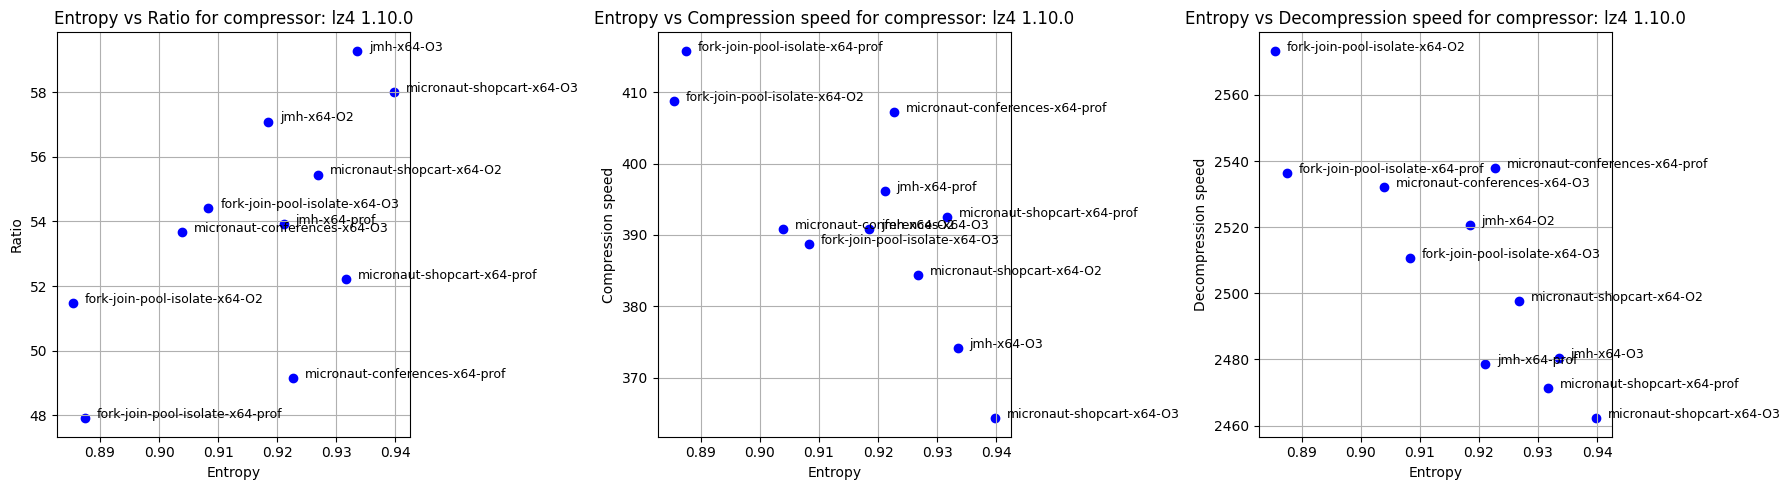

In [95]:
plot_correlate_dataset("corpus", 'lz4 1.10.0')

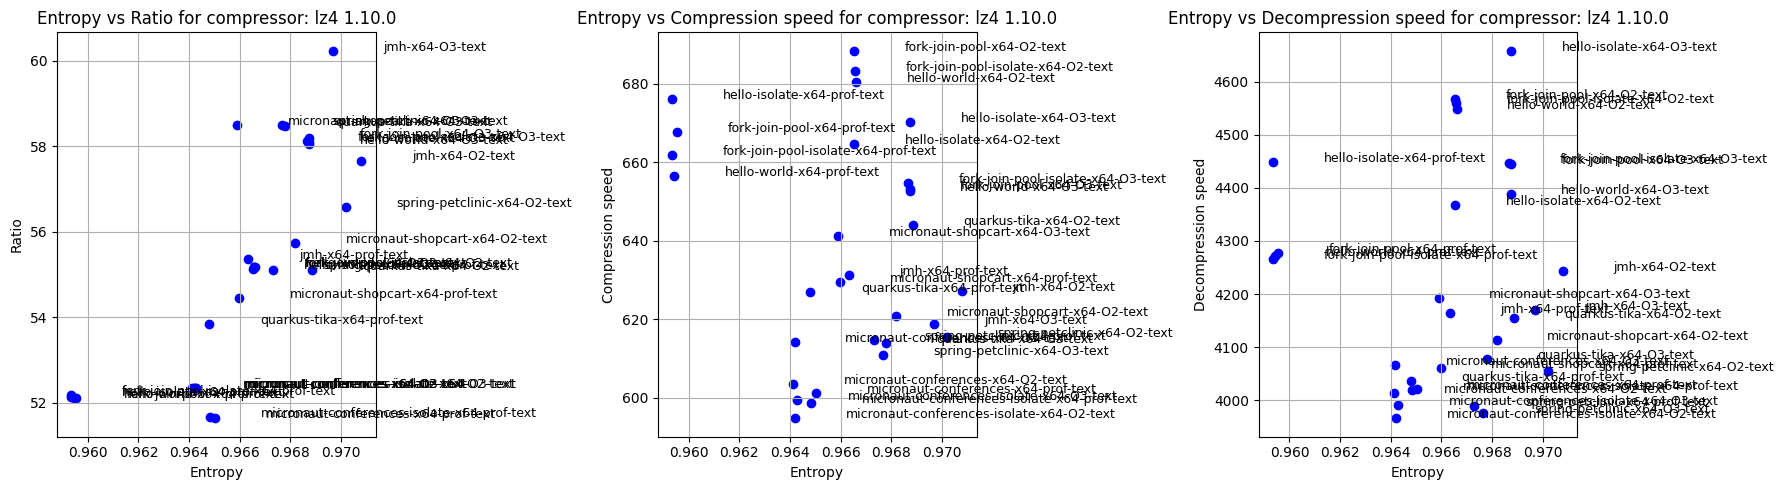

In [103]:
plot_correlate_dataset("corpus_text", 'lz4 1.10.0')